In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpatches
import docx

In [2]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\Desktop\NPS Crash Data"
os.chdir(myworkingdirectory)

In [3]:
analysis_2023 = pd.read_csv("./analysis_database_2023.csv")

In [4]:
analysis_2023.shape

(207505, 56)

In [5]:
analysis_2023.head()

INCID_NO  5_mph  10_mph  15_mph  20_mph  25_mph  30_mph  35_mph  \
0  ABLI070425075000      0       0       0       0       0       0       0   
1  ABLI070804175500      1       0       0       0       0       0       0   
2  ABLI091117170900      0       0       0       0       1       0       0   
3  ABLI121009110000      0       0       0       0       1       0       0   
4  ABLI140610163500      0       0       0       0       0       0       0   

   40_mph  45_mph  ...  Poor Lighting  LATITUDE  LONGITUDE  Park  RGN    YEAR  \
0       0       0  ...            0.0       NaN        NaN  ABLI  SER  2007.0   
1       0       0  ...            0.0       NaN        NaN  ABLI  SER  2007.0   
2       0       0  ...            1.0       NaN        NaN  ABLI  SER  2009.0   
3       0       0  ...            0.0       NaN        NaN  ABLI  SER  2012.0   
4       0       0  ...            0.0  38.91205  -76.93412  ABLI  SER  2014.0   

   MONTH  DOW  HOUR  database  
0    4.0  3.0   7.0       CDS  
1    8.0  6.0  17.0       CDS  
2   11.0  2.0  17.0       CDS  
3   10.0  2.0  11.0       CDS  
4    6.0  2.0  16.0       CDS  

[5 rows x 56 columns]

In [6]:
analysis_2023.columns

Index(['INCID_NO', '5_mph', '10_mph', '15_mph', '20_mph', '25_mph', '30_mph',
       '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph', '65_mph',
       '70_mph', '75_mph', 'no_posted_speed', 'NUM_VEH', 'Num_Motorcycle',
       'Motorcycle_Ind', 'No Injury', 'Possible Injury',
       'Non-incapacitating Injury', 'Incapacitating Injury', 'Fatality',
       'Num_Motorist', 'Num_Non_Motorist', 'Num_Pedestrian', 'Num_Ped_Deaths',
       'Pedestrian', 'VRU', 'Crash_Severity', 'CrashSeverity_Fatal',
       'CrashSeverity_Incap', 'CrashSeverity_NonIncap',
       'CrashSeverity_Possible', 'CrashSeverity_NoInj', 'First_Harmful_Event',
       'First_Harmful_Event_Type', 'Involving Animal', 'Daylight', 'Dawn',
       'Dusk', 'Dark_Lit', 'Dark_NotLit', 'Dark_UnknownLit', 'Poor Lighting',
       'LATITUDE', 'LONGITUDE', 'Park', 'RGN', 'YEAR', 'MONTH', 'DOW', 'HOUR',
       'database'],
      dtype='object')

# 2D Heatmap Plotting

## Fatalities - Percentage

In [98]:
allfatals = analysis_2023[['HOUR','MONTH','Fatality']]
allfatals.head()

HOUR  MONTH  Fatality
0   7.0    4.0       0.0
1  17.0    8.0       0.0
2  17.0   11.0       0.0
3  11.0   10.0       0.0
4  16.0    6.0       0.0

In [99]:
# aggregate all fatalities at same month and hour
allfatals_agg = allfatals.groupby(['MONTH','HOUR']).sum().reset_index()
allfatals_agg.head()

MONTH  HOUR  Fatality
0    1.0   0.0       0.0
1    1.0   1.0       6.0
2    1.0   2.0       8.0
3    1.0   3.0       2.0
4    1.0   4.0       1.0

In [100]:
totalfatals = analysis_2023['Fatality'].sum()
allfatals_perc = allfatals_agg[['HOUR','MONTH']]
allfatals_perc['Fatality'] = allfatals_agg['Fatality']/totalfatals*100
allfatals_perc.head()

HOUR  MONTH  Fatality
0   0.0    1.0  0.000000
1   1.0    1.0  0.454890
2   2.0    1.0  0.606520
3   3.0    1.0  0.151630
4   4.0    1.0  0.075815

In [101]:
allfatals_perc.shape[0] # should have 288 rows for all entries to be filled (24 hours per day * 12 months per year) - looks good!

288

In [102]:
allfatals_perc.Fatality.max()

1.3646702047005308

In [103]:
# 2D heatmap - requires numpy array of just Z values from  3D plot, see example here: https://datavizpyr.com/heatmap-with-matplotlib-in-python/
# query fatality values for each hour, to become columns of array (months are already in order, so rows of array are all set)
midnight_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==0.0]
one_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==1.0]
two_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==2.0]
three_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==3.0]
four_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==4.0]
five_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==5.0]
six_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==6.0]
seven_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==7.0]
eight_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==8.0]
nine_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==9.0]
ten_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==10.0]
eleven_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==11.0]
twelve_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==12.0]
thirteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==13.0]
fourteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==14.0]
fifteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==15.0]
sixteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==16.0]
seventeen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==17.0]
eighteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==18.0]
nineteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==19.0]
twenty_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==20.0]
twentyone_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==21.0]
twentytwo_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==22.0]
twentythree_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==23.0]

# combine columns into wide array
allfatals_perc_array = pd.DataFrame(np.column_stack([midnight_allfatals_perc,one_allfatals_perc,two_allfatals_perc,three_allfatals_perc,four_allfatals_perc,five_allfatals_perc,six_allfatals_perc,seven_allfatals_perc,eight_allfatals_perc,nine_allfatals_perc,ten_allfatals_perc,eleven_allfatals_perc,twelve_allfatals_perc,thirteen_allfatals_perc,fourteen_allfatals_perc,fifteen_allfatals_perc,sixteen_allfatals_perc,seventeen_allfatals_perc,eighteen_allfatals_perc,nineteen_allfatals_perc,twenty_allfatals_perc,twentyone_allfatals_perc,twentytwo_allfatals_perc,twentythree_allfatals_perc]), columns=['midnight_allfatals_perc','one_allfatals_perc','two_allfatals_perc','three_allfatals_perc','four_allfatals_perc','five_allfatals_perc','six_allfatals_perc','seven_allfatals_perc','eight_allfatals_perc','nine_allfatals_perc','ten_allfatals_perc','eleven_allfatals_perc','twelve_allfatals_perc','thirteen_allfatals_perc','fourteen_allfatals_perc','fifteen_allfatals_perc','sixteen_allfatals_perc','seventeen_allfatals_perc','eighteen_allfatals_perc','nineteen_allfatals_perc','twenty_allfatals_perc','twentyone_allfatals_perc','twentytwo_allfatals_perc','twentythree_allfatals_perc'])
allfatals_perc_array.head()

midnight_allfatals_perc  one_allfatals_perc  two_allfatals_perc  \
0                 0.000000            0.454890            0.606520   
1                 0.151630            0.227445            0.151630   
2                 0.303260            0.151630            0.151630   
3                 0.758150            0.303260            0.606520   
4                 0.530705            0.000000            0.530705   

   three_allfatals_perc  four_allfatals_perc  five_allfatals_perc  \
0              0.151630             0.075815             0.151630   
1              0.379075             0.000000             0.151630   
2              0.682335             0.379075             0.227445   
3              0.454890             0.227445             0.758150   
4              0.606520             0.151630             0.454890   

   six_allfatals_perc  seven_allfatals_perc  eight_allfatals_perc  \
0            0.151630              0.303260              0.075815   
1            0.000000              0.151630              0.530705   
2            0.303260              0.075815              0.303260   
3            0.606520              0.530705              0.151630   
4            0.227445              0.151630              0.530705   

   nine_allfatals_perc  ...  fourteen_allfatals_perc  fifteen_allfatals_perc  \
0             0.075815  ...                 0.682335                0.000000   
1             0.000000  ...                 0.454890                0.530705   
2             0.075815  ...                 0.151630                0.151630   
3             0.075815  ...                 0.985595                0.227445   
4             0.000000  ...                 0.379075                0.454890   

   sixteen_allfatals_perc  seventeen_allfatals_perc  eighteen_allfatals_perc  \
0                0.000000                  0.454890                 0.227445   
1                0.454890                  0.151630                 0.000000   
2                0.379075                  0.682335                 0.454890   
3                0.530705                  0.379075                 0.303260   
4                0.530705                  0.454890                 0.379075   

   nineteen_allfatals_perc  twenty_allfatals_perc  twentyone_allfatals_perc  \
0                 0.000000               0.303260                  0.303260   
1                 0.454890               0.227445                  0.075815   
2                 0.227445               0.530705                  0.151630   
3                 0.075815               0.227445                  0.379075   
4                 0.682335               0.000000                  0.379075   

   twentytwo_allfatals_perc  twentythree_allfatals_perc  
0                  0.075815                    0.379075  
1                  0.379075                    0.075815  
2                  0.682335                    0.227445  
3                  0.909780                    0.075815  
4                  0.454890                    0.303260  

[5 rows x 24 columns]

In [104]:
# prep to set index
allfatals_perc_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
allfatals_perc_array.head()

midnight_allfatals_perc  one_allfatals_perc  two_allfatals_perc  \
0                 0.000000            0.454890            0.606520   
1                 0.151630            0.227445            0.151630   
2                 0.303260            0.151630            0.151630   
3                 0.758150            0.303260            0.606520   
4                 0.530705            0.000000            0.530705   

   three_allfatals_perc  four_allfatals_perc  five_allfatals_perc  \
0              0.151630             0.075815             0.151630   
1              0.379075             0.000000             0.151630   
2              0.682335             0.379075             0.227445   
3              0.454890             0.227445             0.758150   
4              0.606520             0.151630             0.454890   

   six_allfatals_perc  seven_allfatals_perc  eight_allfatals_perc  \
0            0.151630              0.303260              0.075815   
1            0.000000              0.151630              0.530705   
2            0.303260              0.075815              0.303260   
3            0.606520              0.530705              0.151630   
4            0.227445              0.151630              0.530705   

   nine_allfatals_perc  ...  fifteen_allfatals_perc  sixteen_allfatals_perc  \
0             0.075815  ...                0.000000                0.000000   
1             0.000000  ...                0.530705                0.454890   
2             0.075815  ...                0.151630                0.379075   
3             0.075815  ...                0.227445                0.530705   
4             0.000000  ...                0.454890                0.530705   

   seventeen_allfatals_perc  eighteen_allfatals_perc  nineteen_allfatals_perc  \
0                  0.454890                 0.227445                 0.000000   
1                  0.151630                 0.000000                 0.454890   
2                  0.682335                 0.454890                 0.227445   
3                  0.379075                 0.303260                 0.075815   
4                  0.454890                 0.379075                 0.682335   

   twenty_allfatals_perc  twentyone_allfatals_perc  twentytwo_allfatals_perc  \
0               0.303260                  0.303260                  0.075815   
1               0.227445                  0.075815                  0.379075   
2               0.530705                  0.151630                  0.682335   
3               0.227445                  0.379075                  0.909780   
4               0.000000                  0.379075                  0.454890   

   twentythree_allfatals_perc  month  
0                    0.379075    Jan  
1                    0.075815    Feb  
2                    0.227445    Mar  
3                    0.075815    Apr  
4                    0.303260    May  

[5 rows x 25 columns]

In [105]:
# set index
allfatals_perc_array = allfatals_perc_array.set_index('month')
allfatals_perc_array.head()

midnight_allfatals_perc  one_allfatals_perc  two_allfatals_perc  \
month                                                                    
Jan                   0.000000            0.454890            0.606520   
Feb                   0.151630            0.227445            0.151630   
Mar                   0.303260            0.151630            0.151630   
Apr                   0.758150            0.303260            0.606520   
May                   0.530705            0.000000            0.530705   

       three_allfatals_perc  four_allfatals_perc  five_allfatals_perc  \
month                                                                   
Jan                0.151630             0.075815             0.151630   
Feb                0.379075             0.000000             0.151630   
Mar                0.682335             0.379075             0.227445   
Apr                0.454890             0.227445             0.758150   
May                0.606520             0.151630             0.454890   

       six_allfatals_perc  seven_allfatals_perc  eight_allfatals_perc  \
month                                                                   
Jan              0.151630              0.303260              0.075815   
Feb              0.000000              0.151630              0.530705   
Mar              0.303260              0.075815              0.303260   
Apr              0.606520              0.530705              0.151630   
May              0.227445              0.151630              0.530705   

       nine_allfatals_perc  ...  fourteen_allfatals_perc  \
month                       ...                            
Jan               0.075815  ...                 0.682335   
Feb               0.000000  ...                 0.454890   
Mar               0.075815  ...                 0.151630   
Apr               0.075815  ...                 0.985595   
May               0.000000  ...                 0.379075   

       fifteen_allfatals_perc  sixteen_allfatals_perc  \
month                                                   
Jan                  0.000000                0.000000   
Feb                  0.530705                0.454890   
Mar                  0.151630                0.379075   
Apr                  0.227445                0.530705   
May                  0.454890                0.530705   

       seventeen_allfatals_perc  eighteen_allfatals_perc  \
month                                                      
Jan                    0.454890                 0.227445   
Feb                    0.151630                 0.000000   
Mar                    0.682335                 0.454890   
Apr                    0.379075                 0.303260   
May                    0.454890                 0.379075   

       nineteen_allfatals_perc  twenty_allfatals_perc  \
month                                                   
Jan                   0.000000               0.303260   
Feb                   0.454890               0.227445   
Mar                   0.227445               0.530705   
Apr                   0.075815               0.227445   
May                   0.682335               0.000000   

       twentyone_allfatals_perc  twentytwo_allfatals_perc  \
month                                                       
Jan                    0.303260                  0.075815   
Feb                    0.075815                  0.379075   
Mar                    0.151630                  0.682335   
Apr                    0.379075                  0.909780   
May                    0.379075                  0.454890   

       twentythree_allfatals_perc  
month                              
Jan                      0.379075  
Feb                      0.075815  
Mar                      0.227445  
Apr                      0.075815  
May                      0.303260  

[5 rows x 24 columns]

In [106]:
# reverse row index so months match order in FHWA EDC-7 plots
allfatals_perc_array_reorder = np.flipud(allfatals_perc_array)

In [107]:
fig, ax = plt.subplots(figsize=(14,7), dpi=700)
im = ax.imshow(allfatals_perc_array_reorder, cmap = "Reds")
months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
plt.yticks(range(len(months)), months, fontsize = 12)
plt.xticks(fontsize = 12)
cbar = ax.figure.colorbar(im, shrink = 0.75)
cbar.ax.set_title('% Fatalities', fontsize = 14)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("Hour (24)", fontsize = 16)
ax.set_ylabel("Month", fontsize = 16)
ax.set_title("Percent of Total %Region% Fatalities by Month and Hour", size = 20)

for i in range(len(months)):
    for j in range(24):
        text = ax.text(j, i, round(allfatals_perc_array_reorder[i, j],1), ha="center", va="center", color="dodgerblue", weight="bold")

In [123]:
regions = ["NCR","NER","SER","MWR","IMR","PWR","AKR"]
for region in regions:
    df = analysis_2023.loc[analysis_2023['RGN']==region]
    allfatals = df[['HOUR','MONTH','Fatality']]
    allfatals_agg = allfatals.groupby(['MONTH','HOUR']).sum().reset_index() # aggregate all fatalities at same month and hour

    totalfatals = df['Fatality'].sum()
    allfatals_perc = allfatals_agg[['HOUR','MONTH']] # set up percent table
    allfatals_perc['Fatality'] = allfatals_agg['Fatality']/totalfatals*100 # compute percent value
    allfatals_perc.to_csv('./allfatals_perc_' + region + '.csv', index = False) # print values for manual fix if needed for missing values

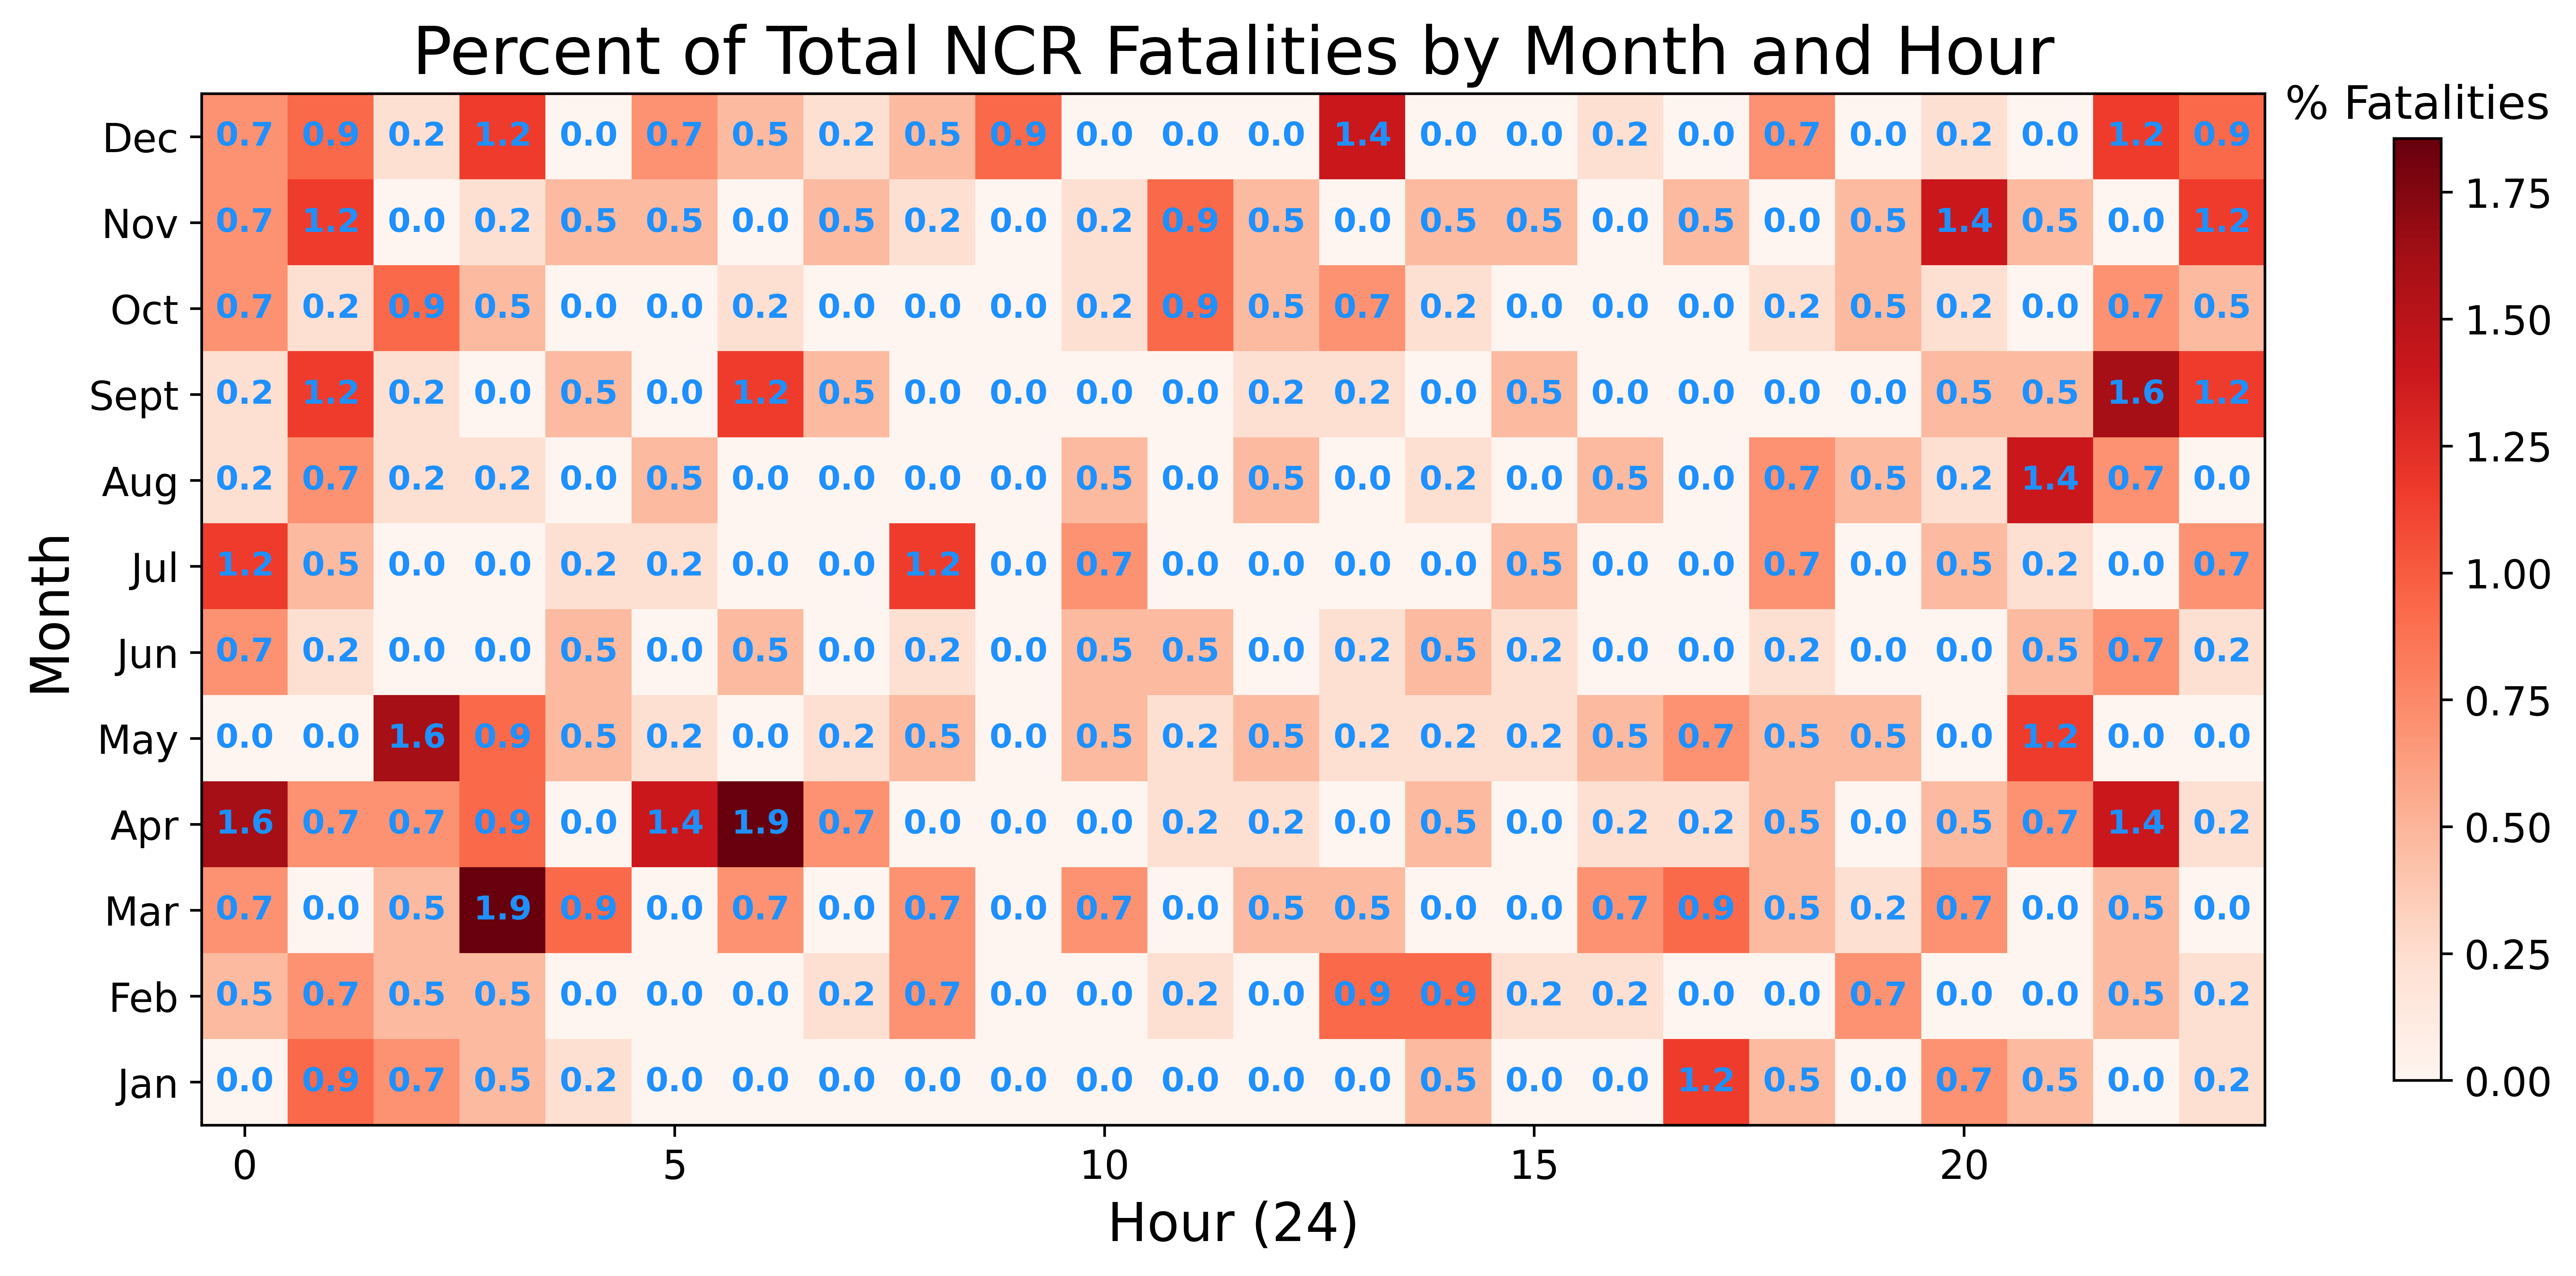

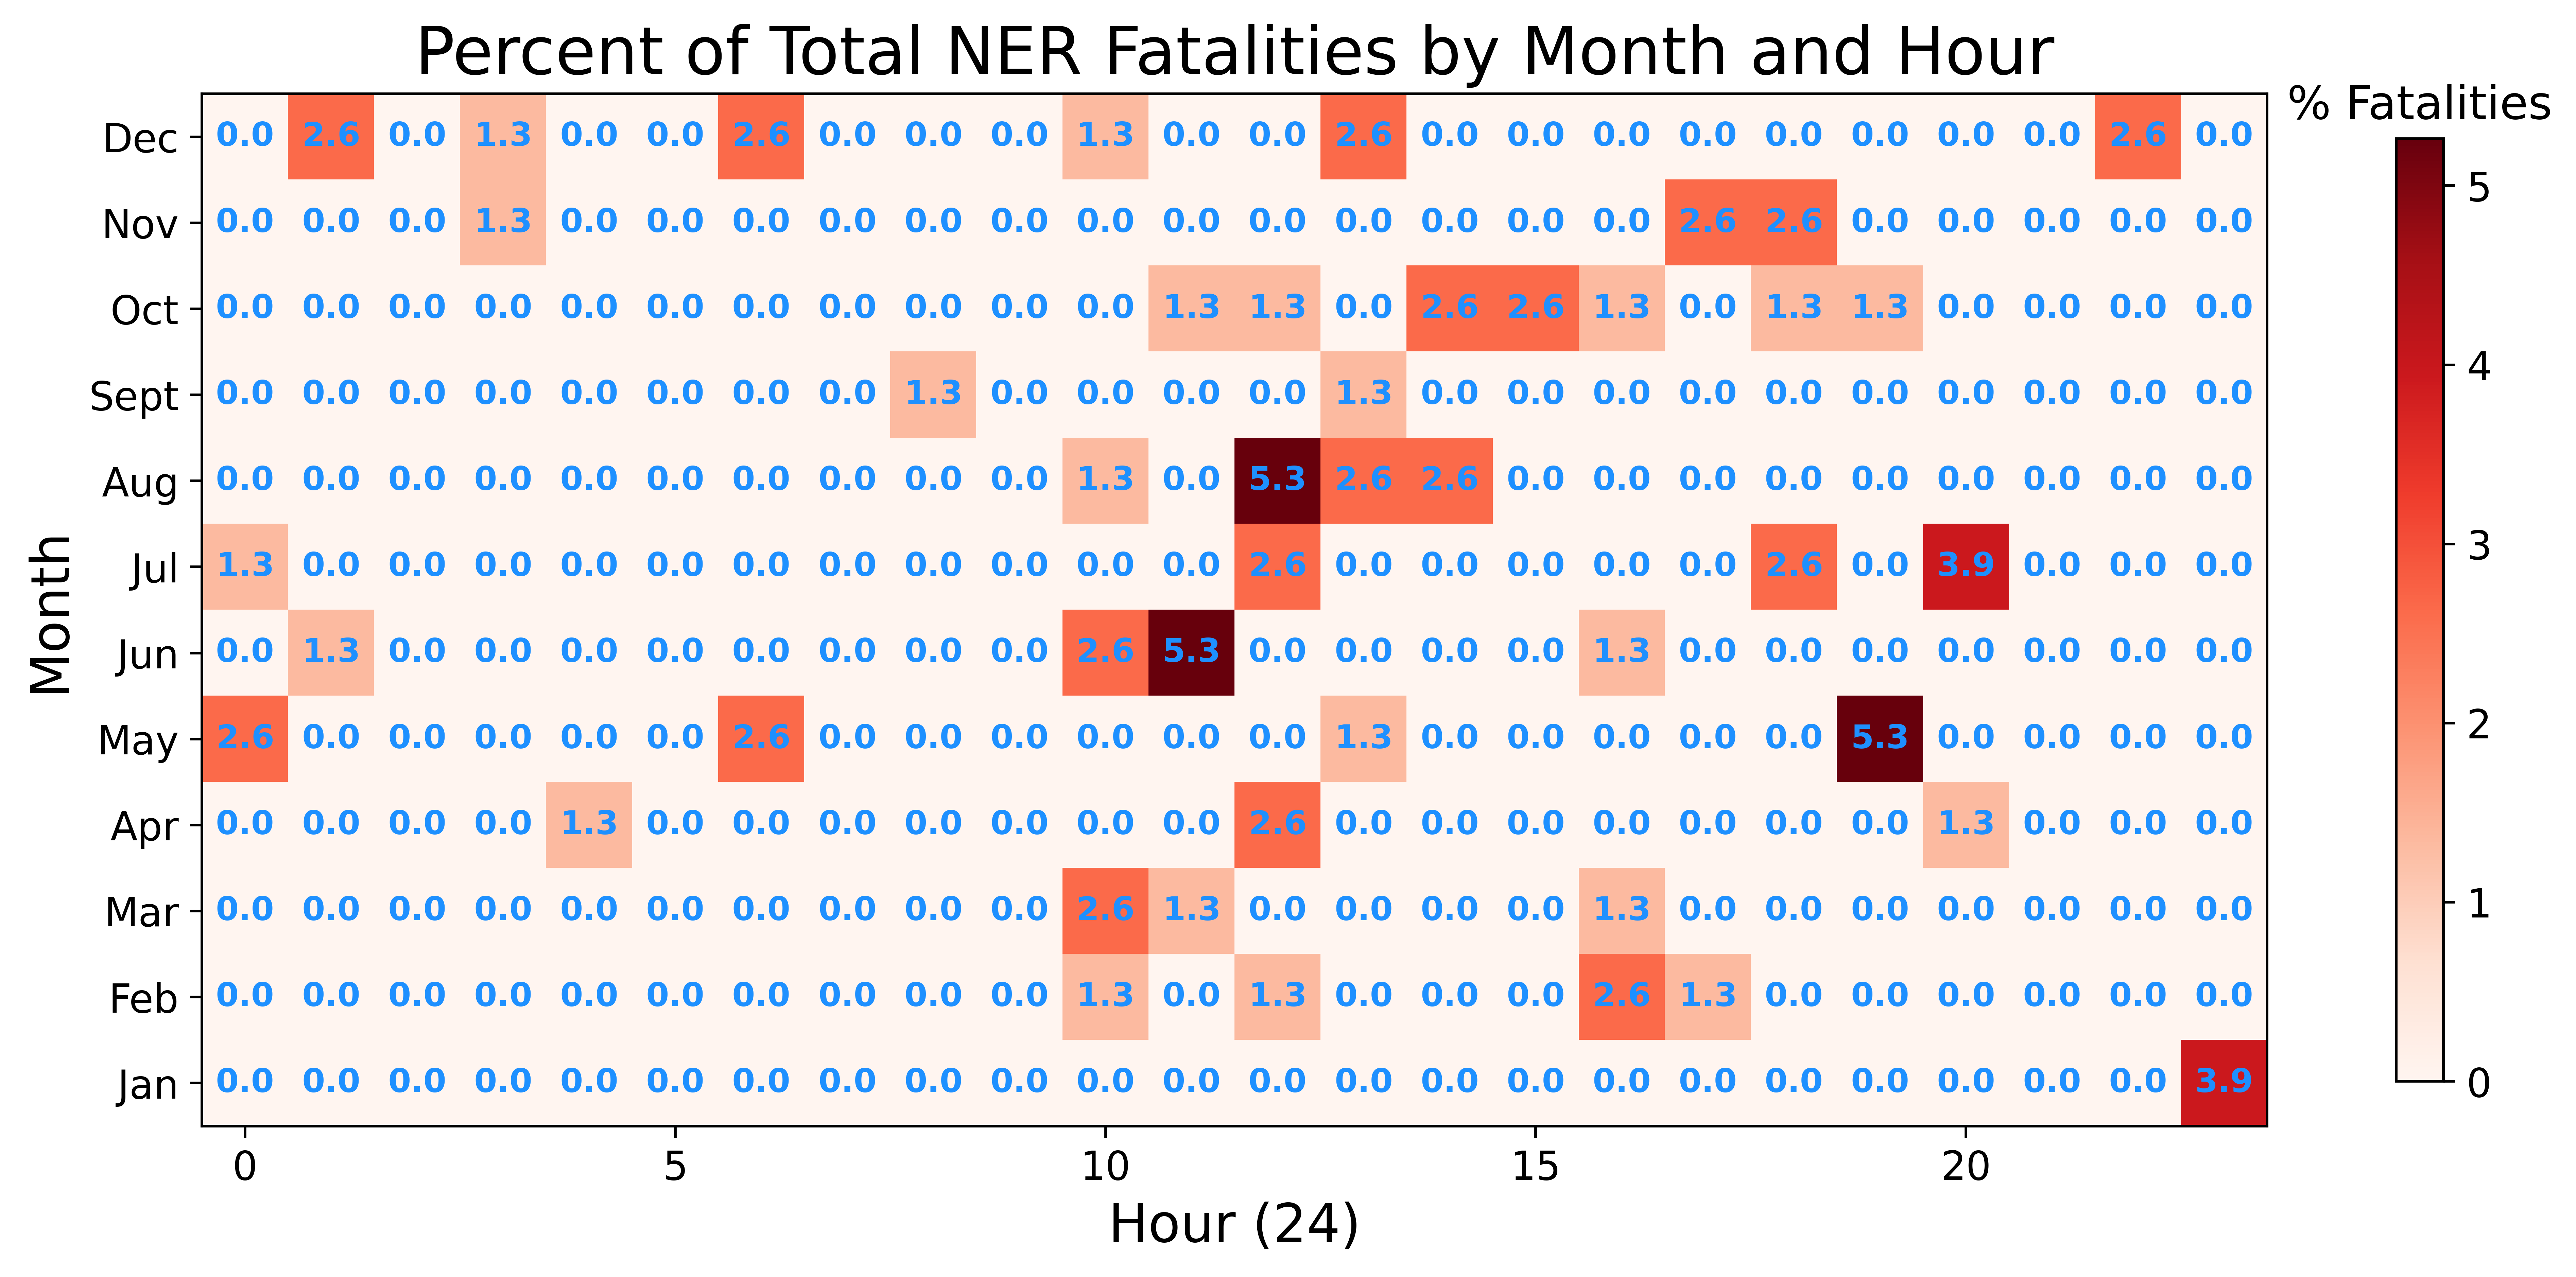

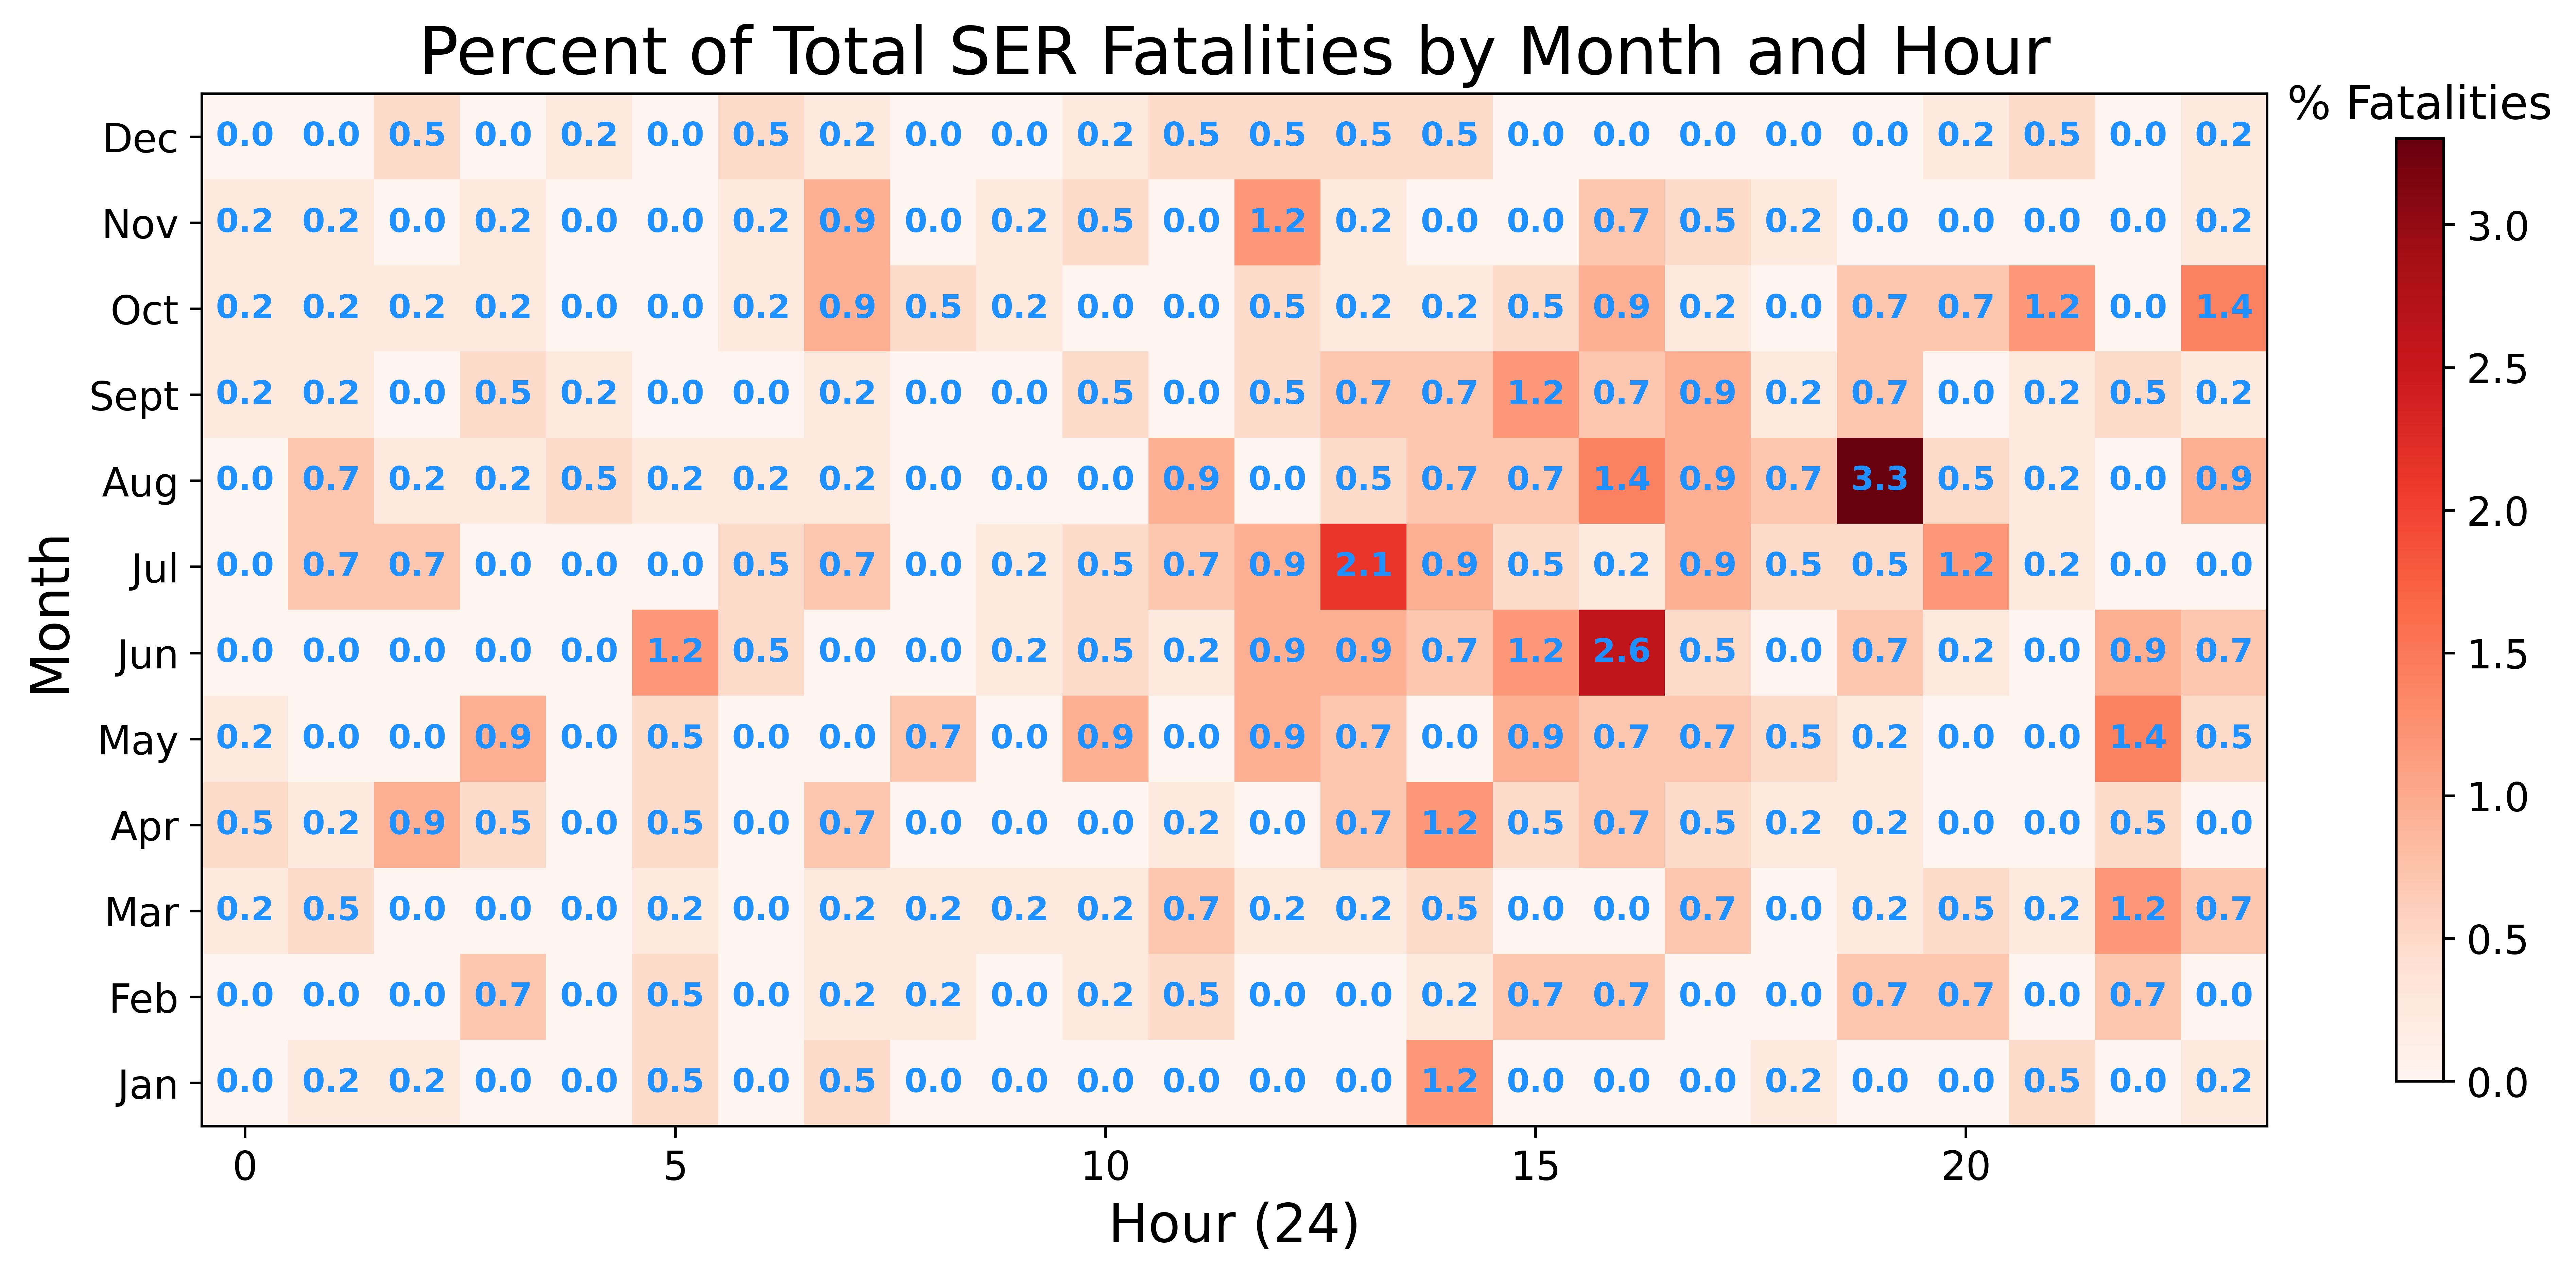

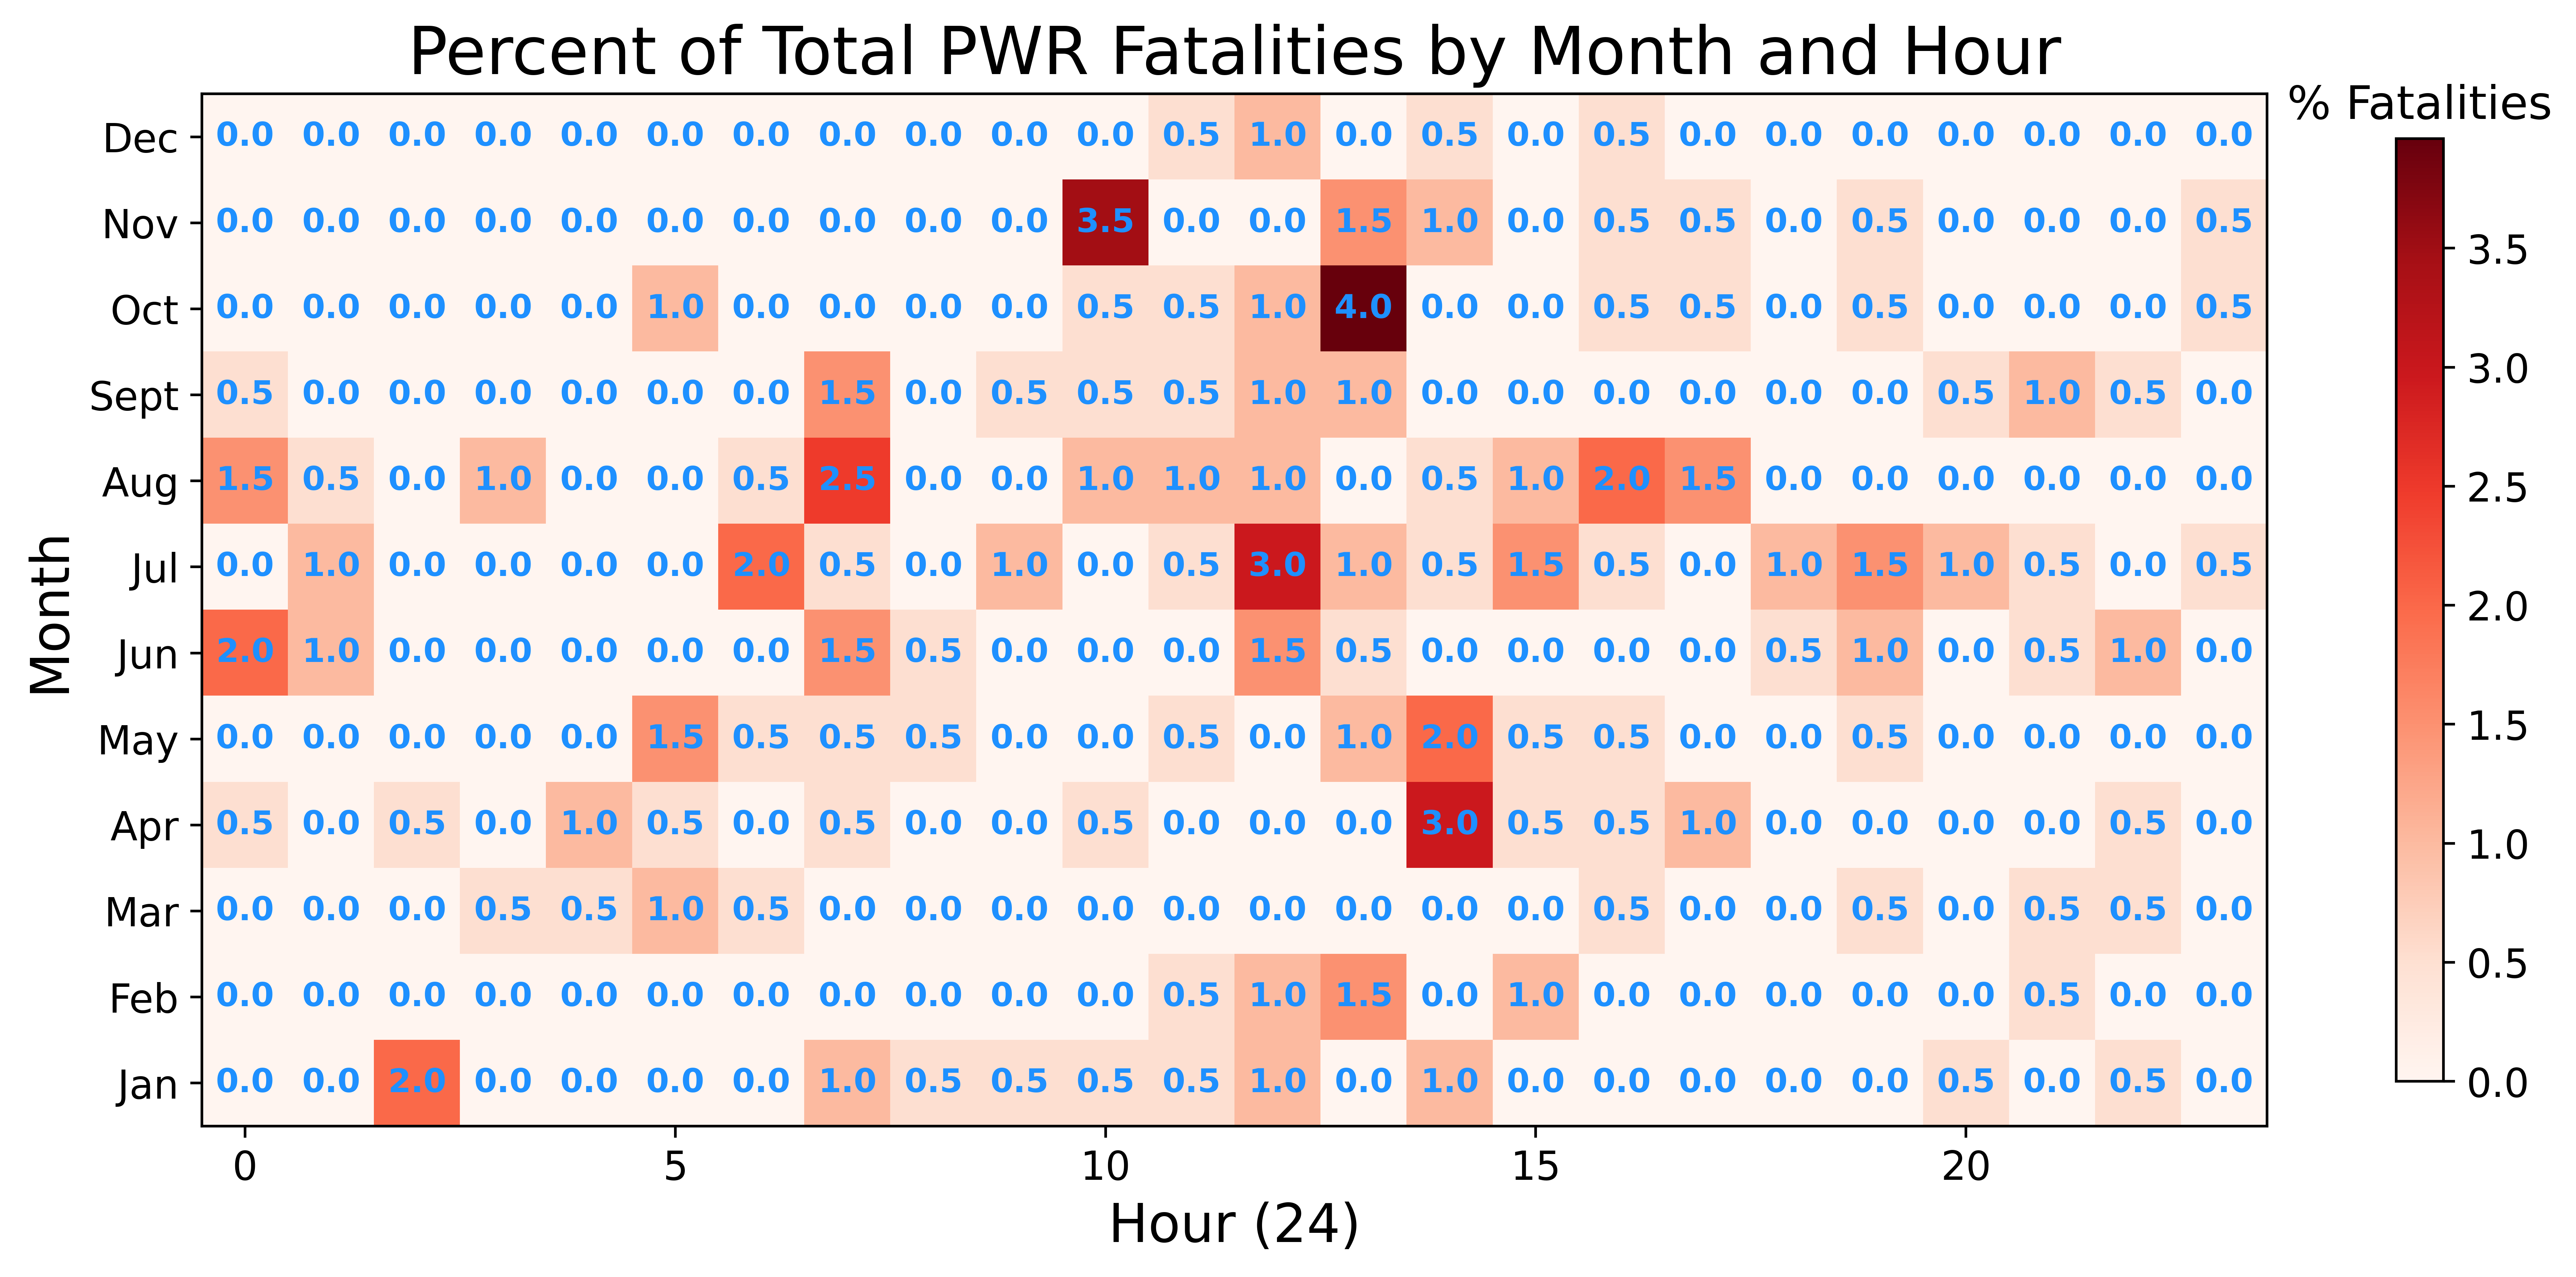

In [145]:
for region in regions:
    allfatals_perc = pd.read_csv("./allfatals_perc_" + region + ".csv") # read in manually fixed files for further processing
    # pull out columns for each hour
    midnight_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==0.0]
    one_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==1.0]
    two_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==2.0]
    three_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==3.0]
    four_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==4.0]
    five_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==5.0]
    six_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==6.0]
    seven_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==7.0]
    eight_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==8.0]
    nine_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==9.0]
    ten_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==10.0]
    eleven_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==11.0]
    twelve_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==12.0]
    thirteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==13.0]
    fourteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==14.0]
    fifteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==15.0]
    sixteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==16.0]
    seventeen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==17.0]
    eighteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==18.0]
    nineteen_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==19.0]
    twenty_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==20.0]
    twentyone_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==21.0]
    twentytwo_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==22.0]
    twentythree_allfatals_perc = allfatals_perc['Fatality'].loc[allfatals_perc['HOUR']==23.0]

    # combine columns into wide array
    allfatals_perc_array = pd.DataFrame(np.column_stack([midnight_allfatals_perc,one_allfatals_perc,two_allfatals_perc,three_allfatals_perc,four_allfatals_perc,five_allfatals_perc,six_allfatals_perc,seven_allfatals_perc,eight_allfatals_perc,nine_allfatals_perc,ten_allfatals_perc,eleven_allfatals_perc,twelve_allfatals_perc,thirteen_allfatals_perc,fourteen_allfatals_perc,fifteen_allfatals_perc,sixteen_allfatals_perc,seventeen_allfatals_perc,eighteen_allfatals_perc,nineteen_allfatals_perc,twenty_allfatals_perc,twentyone_allfatals_perc,twentytwo_allfatals_perc,twentythree_allfatals_perc]), columns=['midnight_allfatals_perc','one_allfatals_perc','two_allfatals_perc','three_allfatals_perc','four_allfatals_perc','five_allfatals_perc','six_allfatals_perc','seven_allfatals_perc','eight_allfatals_perc','nine_allfatals_perc','ten_allfatals_perc','eleven_allfatals_perc','twelve_allfatals_perc','thirteen_allfatals_perc','fourteen_allfatals_perc','fifteen_allfatals_perc','sixteen_allfatals_perc','seventeen_allfatals_perc','eighteen_allfatals_perc','nineteen_allfatals_perc','twenty_allfatals_perc','twentyone_allfatals_perc','twentytwo_allfatals_perc','twentythree_allfatals_perc'])
    allfatals_perc_array['month']=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'] # prep to set array index
    allfatals_perc_array = allfatals_perc_array.set_index('month') # set array index
    allfatals_perc_array_reorder = np.flipud(allfatals_perc_array) # reverse row index so months match order in FHWA EDC-7 plots

    # generate figure
    fig, ax = plt.subplots(figsize=(14,7), dpi=700)
    im = ax.imshow(allfatals_perc_array_reorder, cmap = "Reds")
    months = ['Dec','Nov','Oct','Sept','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']
    plt.yticks(range(len(months)), months, fontsize = 12)
    plt.xticks(fontsize = 12)
    cbar = ax.figure.colorbar(im, shrink = 0.75)
    cbar.ax.set_title('% Fatalities', fontsize = 14)
    cbar.ax.tick_params(labelsize=12)
    ax.set_xlabel("Hour (24)", fontsize = 16)
    ax.set_ylabel("Month", fontsize = 16)
    ax.set_title("Percent of Total " + region + " Fatalities by Month and Hour", size = 20)

    for i in range(len(months)):
        for j in range(24):
            text = ax.text(j, i, round(allfatals_perc_array_reorder[i, j],1), ha="center", va="center", color="dodgerblue", weight="bold")

    fig_name = './Figures/2D heatmaps/Percent Total Fatalities/' + region + ".png"
    plt.savefig(fig_name)

## Number of Crashes Involving Animals

In [21]:
animal = analysis_2023.loc[analysis_2023['Involving Animal']==1.0]
animalcount = animal[['HOUR','MONTH']] # X and Y dimensions of surface plot
animalcount['Count'] = 1 # Z dimension of surface plot
animalcount_agg = animalcount.groupby(['MONTH','HOUR']).sum().reset_index()
animalcount_agg.head()

<ipython-input-21-51eef4c12ed0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animalcount['Count'] = 1 # Z dimension of surface plot


MONTH  HOUR  Count
0    1.0   0.0     26
1    1.0   1.0     27
2    1.0   2.0     13
3    1.0   3.0     13
4    1.0   4.0     13

## Percent of Crashes Involving Animals

In [34]:
animaltotalcrashcount = animal.shape[0]
animalcount_percofanimaltotal = animalcount_agg[['HOUR','MONTH']]
animalcount_percofanimaltotal['Count'] = animalcount_agg['Count']/animaltotalcrashcount*100
animalcount_percofanimaltotal.head()

HOUR  MONTH     Count
0     0    1.0  0.113418
1     1    1.0  0.117780
2     2    1.0  0.056709
3     3    1.0  0.056709
4     4    1.0  0.056709

## Number of Crashes Involving Motorcycles

In [40]:
motorcycle = analysis_2023.loc[analysis_2023['Motorcycle_Ind']==1.0]
motorcyclecount = motorcycle[['HOUR','MONTH']] # X and Y dimensions of surface plot
motorcyclecount['Count'] = 1 # Z dimension of surface plot
motorcyclecount_agg = motorcyclecount.groupby(['MONTH','HOUR']).sum().reset_index()
motorcyclecount_agg.head()

<ipython-input-40-5afb12c091c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorcyclecount['Count'] = 1 # Z dimension of surface plot


MONTH  HOUR  Count
0    1.0   0.0      1
1    1.0   4.0      1
2    1.0   5.0      1
3    1.0   6.0      3
4    1.0   7.0      1

## Number of Crashes Involving VRUs

In [47]:
VRU = analysis_2023.loc[analysis_2023['VRU']==1.0]
VRUcount = VRU[['HOUR','MONTH']] # X and Y dimensions of surface plot
VRUcount['Count'] = 1 # Z dimension of surface plot
VRUcount_agg = VRUcount.groupby(['MONTH','HOUR']).sum().reset_index()
VRUcount_agg.head()

<ipython-input-47-57bd9079b99f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VRUcount['Count'] = 1 # Z dimension of surface plot


MONTH  HOUR  Count
0    1.0   1.0      3
1    1.0   3.0      1
2    1.0   6.0      5
3    1.0   7.0      4
4    1.0   8.0      4

## Percentage of Crashes Involving VRUs

In [54]:
VRUtotalcrashcount = VRU.shape[0]
VRUcount_percofVRUtotal = VRUcount_agg[['HOUR','MONTH']]
VRUcount_percofVRUtotal['Count'] = VRUcount_agg['Count']/VRUtotalcrashcount*100
VRUcount_percofVRUtotal.head()

HOUR  MONTH     Count
0     0      1  0.000000
1     1      1  0.141443
2     2      1  0.000000
3     3      1  0.047148
4     4      1  0.000000

## Number of Pedestrian Fatalities

In [90]:
pedfatals = analysis_2023[['HOUR','MONTH','Num_Ped_Deaths']]
pedfatals.head()

HOUR  MONTH  Num_Ped_Deaths
0   7.0    4.0               0
1  17.0    8.0               0
2  17.0   11.0               0
3  11.0   10.0               0
4  16.0    6.0               0

## Percentage of Pedestrian Fatalities

In [102]:
totalpedfatals = analysis_2023['Num_Ped_Deaths'].sum()
pedfatals_array_reorder_perc = pedfatals_array_reorder/totalpedfatals*100
reordered_array_perc = pd.DataFrame(pedfatals_array_reorder_perc)
reordered_array_perc.to_csv('./PercentPedestrianFatals_array_reorder.csv', index = True) # check looks good!

## Number of Fatalities in Crashes involving Motorcycles (not necessarily motorcyclist fatalities)

In [104]:
motorcyclefatals = motorcycle[['HOUR','MONTH','Fatality']]
motorcyclefatals.head()

HOUR  MONTH  Fatality
32  13.0    7.0       0.0
37  22.0    8.0       0.0
59  13.0   10.0       0.0
87  13.0    7.0       0.0
92  22.0    8.0       0.0

In [105]:
# aggregate all fatalities at same month and hour
motorcyclefatals_agg = motorcyclefatals.groupby(['MONTH','HOUR']).sum().reset_index()
motorcyclefatals_agg.head()

MONTH  HOUR  Fatality
0    1.0   0.0       0.0
1    1.0   4.0       0.0
2    1.0   5.0       0.0
3    1.0   6.0       0.0
4    1.0   7.0       0.0

## Number of Fatalities in Crashes involving Animals (does not include wildlife fatalities)

In [116]:
animalfatals = animal[['HOUR','MONTH','Fatality']]
animalfatals.head()

HOUR  MONTH  Fatality
50    9.0    9.0       0.0
106   9.0    9.0       0.0
145  21.0    7.0       0.0
166  16.0    8.0       0.0
169   2.0    9.0       0.0

In [117]:
# aggregate all fatalities at same month and hour
animalfatals_agg = animalfatals.groupby(['MONTH','HOUR']).sum().reset_index()
animalfatals_agg.head()

MONTH  HOUR  Fatality
0    1.0   0.0       0.0
1    1.0   1.0       0.0
2    1.0   2.0       0.0
3    1.0   3.0       0.0
4    1.0   4.0       0.0

## Percentage of Fatalities in Crashes Involving Animals

In [128]:
totalanimalfatals = animalfatals['Fatality'].sum()
animalfatals_array_reorder_perc = animalfatals_array_reorder/totalanimalfatals*100
reordered_array_perc = pd.DataFrame(animalfatals_array_reorder_perc)
reordered_array_perc.to_csv('./PercentAnimalFatals_array_reorder.csv', index = True) # check looks good!

# Pie Chart

In [130]:
analysis_2023.shape[0],(analysis_2023['Daylight'].sum()+analysis_2023['Dawn'].sum()+analysis_2023['Dusk'].sum()+analysis_2023['Dark_Lit'].sum()+analysis_2023['Dark_NotLit'].sum()+analysis_2023['Dark_UnknownLit'].sum())

(207505, 84077.0)

In [131]:
labels = 'Daylight', 'Dawn', 'Dusk', 'Dark - Lit', 'Dark - Not Lit', 'Dark - Unknown Lit', 'Unknown'
sizes = [analysis_2023['Daylight'].sum(), analysis_2023['Dawn'].sum(), analysis_2023['Dusk'].sum(), analysis_2023['Dark_Lit'].sum(), analysis_2023['Dark_NotLit'].sum(), analysis_2023['Dark_UnknownLit'].sum(), (207505-84077)]
explode = (0, 0.1, 0.1, 0.1, 0.1, 0.1, 0) # determine which slices to pop out (in order)

fig, ax = plt.subplots(figsize=(15,15))
ax.pie(sizes, labels=labels,  textprops={'fontsize': 12}, labeldistance=1.1, explode=explode, hatch=['/', '', '.', 'x', '*', 'o', '//'])#, autopct='%1.1f%%')
ax.set_title("All Lighting Conditions", fontsize=20)

Text(0.5, 1.0, 'All Lighting Conditions')

Text(0.5, 1.0, 'General Lighting Condition')

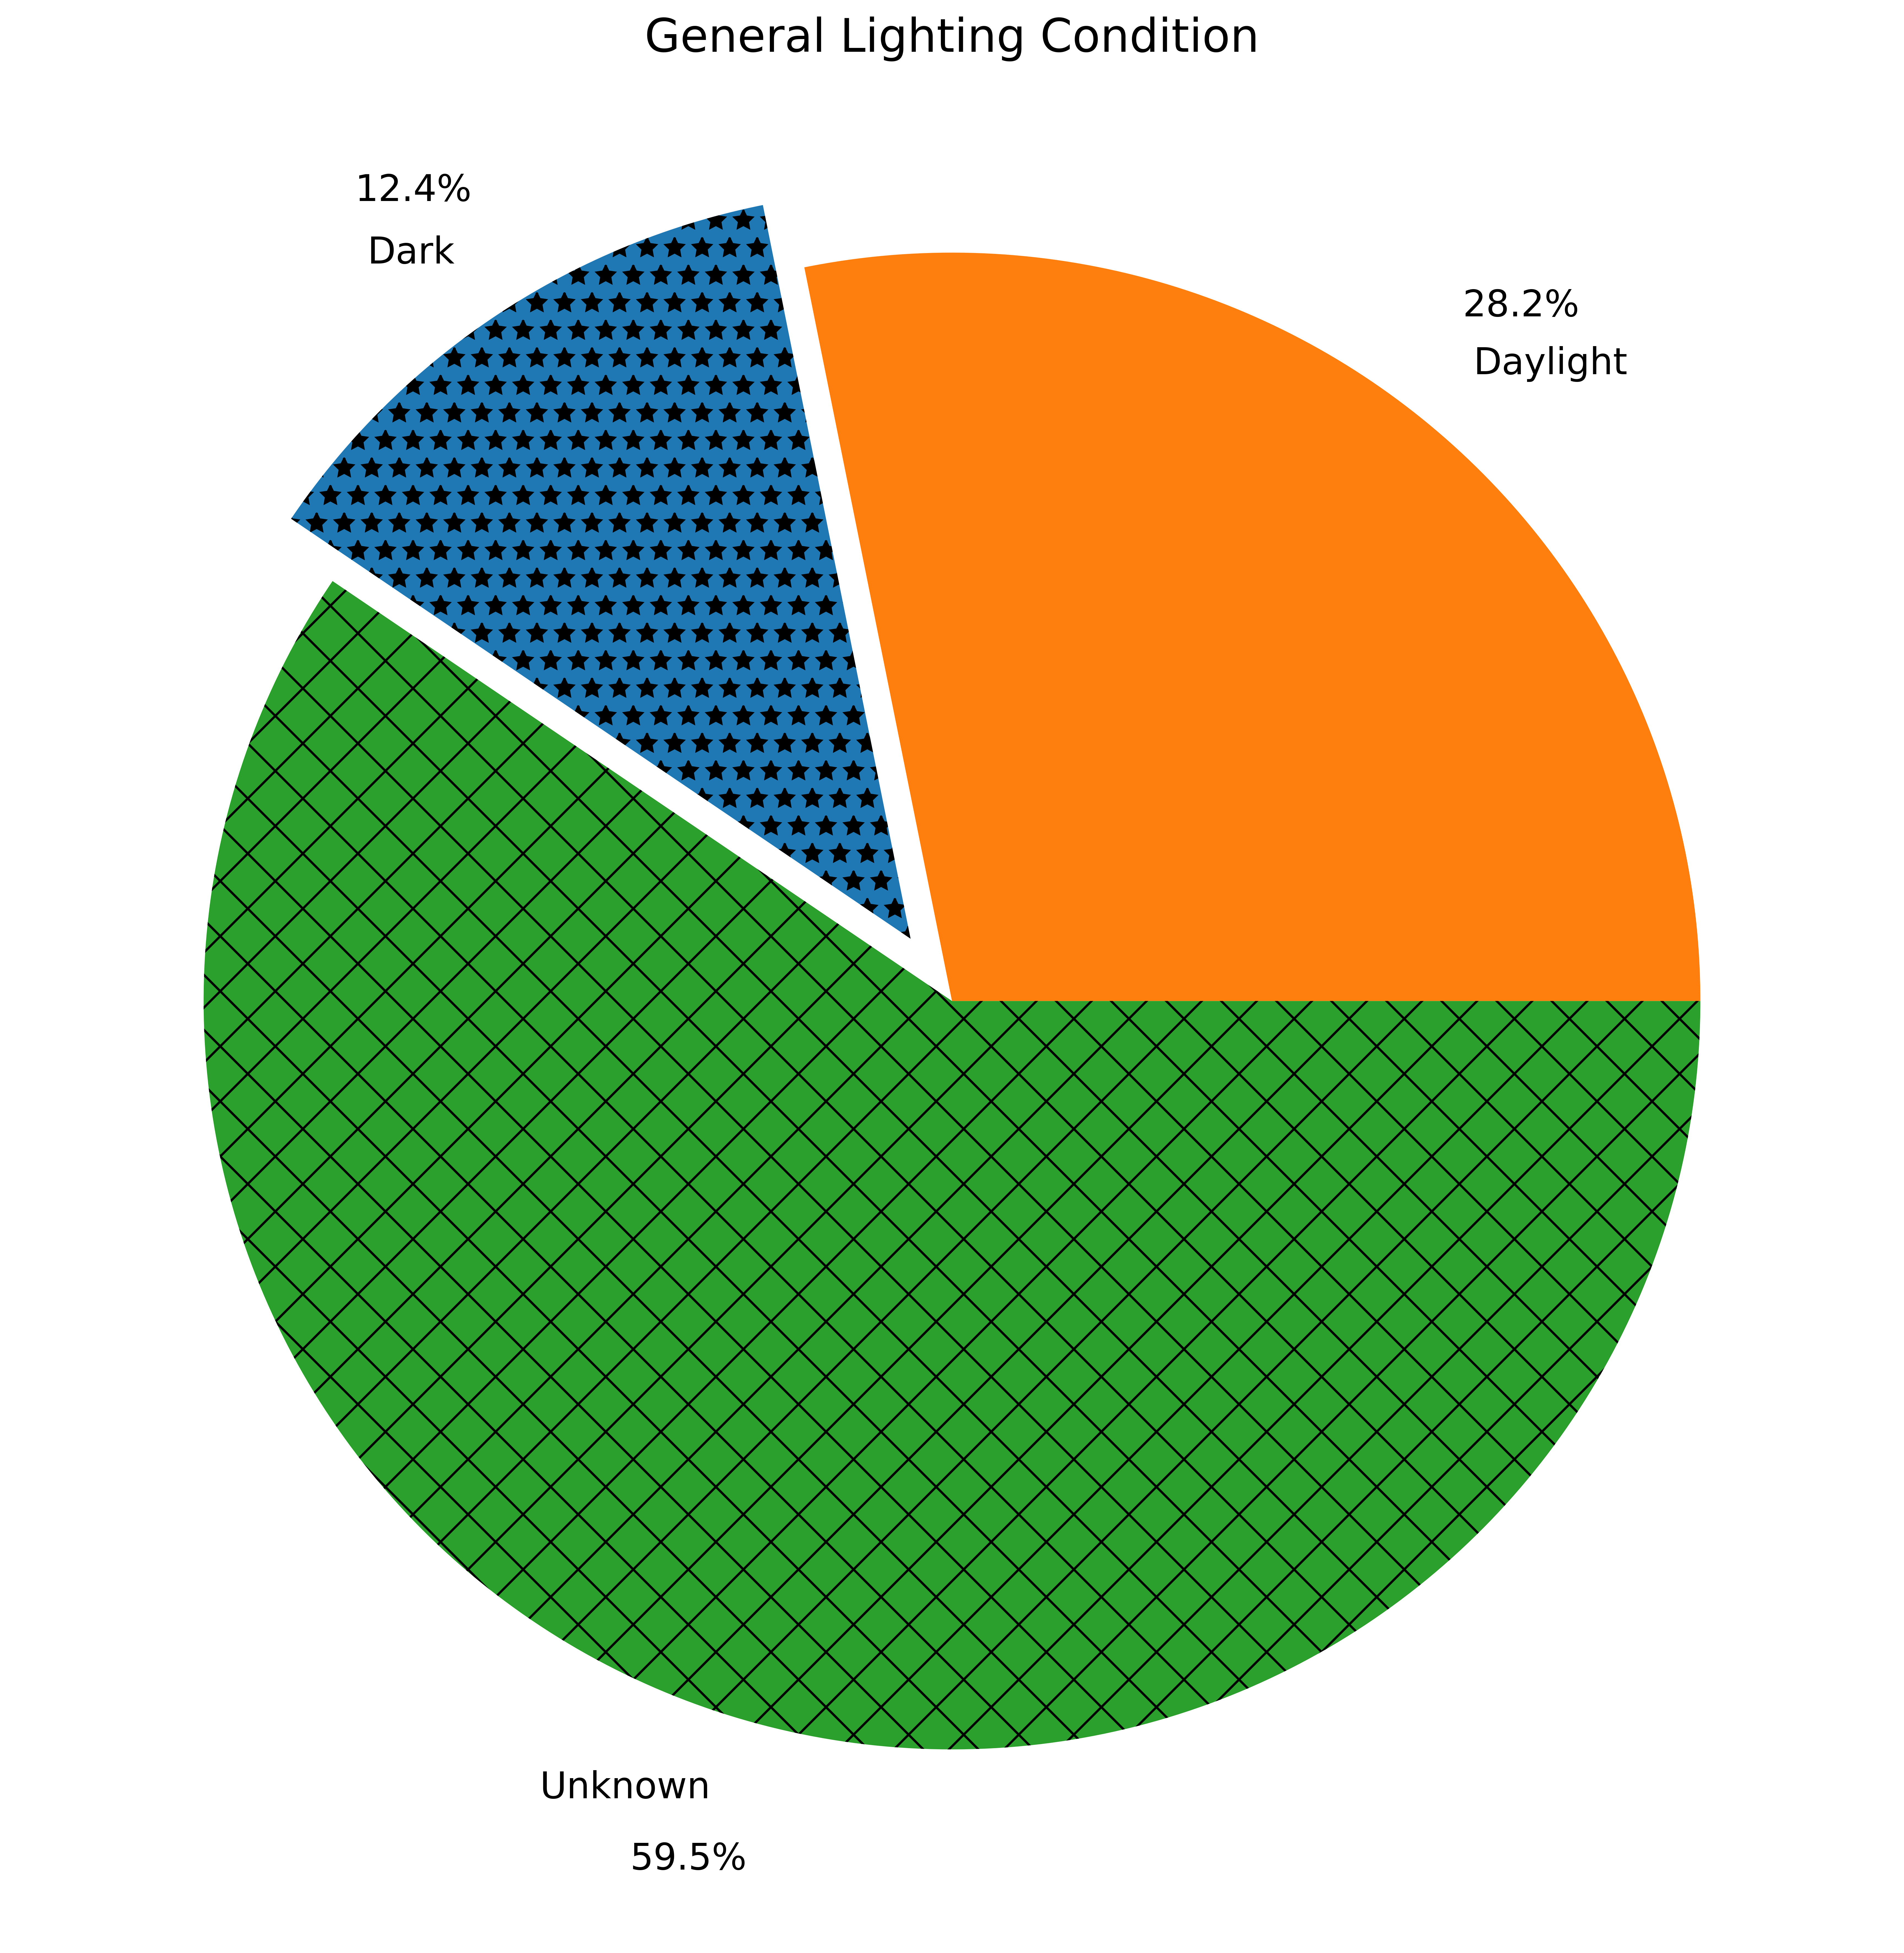

In [132]:
labels = 'Daylight', 'Dark', 'Unknown'
sizes = [analysis_2023['Daylight'].sum(), (analysis_2023['Dawn'].sum()+analysis_2023['Dusk'].sum()+analysis_2023['Dark_Lit'].sum()+analysis_2023['Dark_NotLit'].sum()+analysis_2023['Dark_UnknownLit'].sum()), (207505-84077)]
explode = (0, 0.1, 0) # determine which slices to pop out (in order)

fig, ax = plt.subplots(figsize=(15,15), dpi=600)
ax.pie(sizes, labels=labels, textprops={'fontsize': 16}, autopct='%1.1f%%', pctdistance=1.2, explode=explode, colors = ['tab:orange','tab:blue','tab:green'], hatch=['', '*', 'x'])
ax.set_title("General Lighting Condition", fontsize=20)

In [238]:
labels = 'Daylight', 'Dawn', 'Dusk', 'Dark - Lit', 'Dark - Not Lit', 'Dark - Unknown Lit'
sizes = [analysis_2023['Daylight'].sum(), analysis_2023['Dawn'].sum(), analysis_2023['Dusk'].sum(), analysis_2023['Dark_Lit'].sum(), analysis_2023['Dark_NotLit'].sum(), analysis_2023['Dark_UnknownLit'].sum()]
explode = (0, 0.1, 0.1, 0.1, 0.1, 0.1) # determine which slices to pop out (in order)

fig, ax = plt.subplots(figsize=(15,15))
ax.pie(sizes, labels=labels, textprops={'fontsize': 14}, explode=explode, hatch=['/', '', '.', 'x', '*', 'o'], startangle=90)#, autopct='%1.1f%%')
ax.set_title("Known Lighting Condition", fontsize=20)

Text(0.5, 1.0, 'Known Lighting Condition')

# Prep Data Tables

In [239]:
# focus on darkness attributes re: poor visibility
dark = analysis_2023.loc[analysis_2023["Poor Lighting"]==1]
dark.shape[0]

25640

In [240]:
pd.options.display.max_rows = 10000000
# sort by index to make sure that all CDS to Harmful Event were spelled correctly (i.e., no 01. Overturn and 01. Overtrn)
dark['First_Harmful_Event'].value_counts().sort_index() # looks good!

01. Overturn/rollover                                                       64
02. Fire/explosion                                                           3
03. Immersion                                                                2
07. Ran off the road right                                                 205
08. Ran Off the road left                                                   88
09. Cross median or centerline                                              18
10. Downhill runaway                                                         1
101. Bridge Structure                                                      166
11. Fell/jumped from motor vehicle                                           3
12. Avoiding an object on road                                              11
13. Avoiding an animal on road                                              19
14. Thrown or falling object                                                 8
16. Other non-collision                             

In [241]:
# add outcome columns to set up analysis data tables
dark['Num_Injuries'] = dark['Possible Injury'] + dark['Non-incapacitating Injury'] + dark['Incapacitating Injury']
dark['Num_Crash'] = 1

<ipython-input-241-6867a5704a15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark['Num_Injuries'] = dark['Possible Injury'] + dark['Non-incapacitating Injury'] + dark['Incapacitating Injury']
<ipython-input-241-6867a5704a15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark['Num_Crash'] = 1


In [242]:
# check injury sum - looks good
dark['Possible Injury'].head(), dark['Non-incapacitating Injury'].head(), dark['Incapacitating Injury'].head(), dark['Num_Injuries'].head()

(2     0.0
 64    0.0
 69    0.0
 85    1.0
 92    0.0
 Name: Possible Injury, dtype: float64,
 2     0.0
 64    0.0
 69    0.0
 85    0.0
 92    0.0
 Name: Non-incapacitating Injury, dtype: float64,
 2     0.0
 64    0.0
 69    0.0
 85    0.0
 92    0.0
 Name: Incapacitating Injury, dtype: float64,
 2     0.0
 64    0.0
 69    0.0
 85    1.0
 92    0.0
 Name: Num_Injuries, dtype: float64)

## First Harmful Event Type Table

In [243]:
pd.options.display.max_rows = 10000000
dark['First_Harmful_Event_Type'].value_counts()

Collision with person, MV or non-fixed object    11302
Collision with fixed object                       7370
Collision with animals                            4357
Non-collision                                     1680
Unknown                                            929
Name: First_Harmful_Event_Type, dtype: int64

In [244]:
dark_eventtype_outcomes = dark[['Num_Crash','Fatality','Num_Injuries','First_Harmful_Event_Type']] # subset for metrics Wayne is looking for
# outcomes for each first harmful event type, ordered by most to least common in crash report (reset index such that groupby data are now column in dataframe and can be manipulated as such)
dark_eventtype_agg = dark_eventtype_outcomes.groupby(['First_Harmful_Event_Type']).sum().sort_values(by=['Num_Crash'],ascending=False).reset_index()
dark_eventtype_agg.head()

First_Harmful_Event_Type  Num_Crash  Fatality  \
0  Collision with person, MV or non-fixed object      11302      80.0   
1                    Collision with fixed object       7370     119.0   
2                         Collision with animals       4357       2.0   
3                                  Non-collision       1680      26.0   
4                                        Unknown        929       9.0   

   Num_Injuries  
0        4418.0  
1        2634.0  
2         343.0  
3         559.0  
4         221.0

In [245]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event_Type']=='Collision with fixed object']['Fatality'].sum()

119.0

In [246]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event_Type']=='Collision with animals']['Num_Injuries'].sum()

343.0

In [247]:
# format data table for display
dark_eventtype_agg = dark_eventtype_agg.rename(columns={'First_Harmful_Event_Type':'First Harmful Event Type','Num_Crash':'# of Crashes','Fatality':"# of Fatalities","Num_Injuries":"# of Injuries"})
dark_eventtype_agg.to_csv("./First Harmful Event Type Outcomes.csv", index=False)

## First Harmful Event Table - Absolute Counts

In [248]:
pd.options.display.max_rows = 10000000
dark['First_Harmful_Event'].value_counts()

21. Motor vehicle in transport                                           10510
36. Other wild animal (crocodile, birds, coyote, etc.)                    3727
52. Tree/shrub                                                            2767
16. Other non-collision                                                   1256
47. Guardrail/cable face                                                   854
50. Wall                                                                   778
66. Other fixed object                                                     733
25. Other non-fixed object                                                 686
22. Parked motor vehicle                                                   451
99. Unknown                                                                392
28. Deer                                                                   388
45. Ditch                                                                  355
53. Utility pole/light support                      

In [249]:
dark_event_outcomes = dark[['Num_Crash','Fatality','Num_Injuries','First_Harmful_Event']] # subset for metrics Wayne is looking for
# outcomes for each first harmful event, ordered by most to least common in crash report (reset index such that groupby data are now column in dataframe and can be manipulated as such)
dark_event_agg = dark_event_outcomes.groupby(['First_Harmful_Event']).sum().sort_values(by=['Num_Crash'],ascending=False).reset_index()
dark_event_agg['First_Harmful_Event'] = dark_event_agg['First_Harmful_Event'].str.replace('\d+. ', '') # remove "01. " etc. from each First Harmful Event string
dark_event_agg.head()

<ipython-input-249-23995fd8dbc7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dark_event_agg['First_Harmful_Event'] = dark_event_agg['First_Harmful_Event'].str.replace('\d+. ', '') # remove "01. " etc. from each First Harmful Event string


First_Harmful_Event  Num_Crash  Fatality  \
0                         Motor vehicle in transport      10510      58.0   
1  Other wild animal (crocodile, birds, coyote, e...       3727       1.0   
2                                         Tree/shrub       2767      78.0   
3                                Other non-collision       1256      17.0   
4                               Guardrail/cable face        854       9.0   

   Num_Injuries  
0        4183.0  
1         319.0  
2        1254.0  
3         450.0  
4         230.0

In [250]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event']=='52. Tree/shrub']['Fatality'].sum()

78.0

In [251]:
# check sum - looks good!
dark.loc[dark['First_Harmful_Event']=='47. Guardrail/cable face']['Num_Injuries'].sum()

230.0

In [252]:
# format data table for display
dark_event_agg = dark_event_agg.rename(columns={'First_Harmful_Event':'First Harmful Event','Num_Crash':'# of Crashes','Fatality':"# of Fatalities","Num_Injuries":"# of Injuries"})
dark_event_agg.to_csv("./First Harmful Event Outcomes.csv", index=False)

## First Harmful Event Table - Rates

In [253]:
dark_event_rates = dark_event_agg[['First Harmful Event', '# of Crashes']]
dark_event_rates['Fatality Rate (%)'] = round(dark_event_agg['# of Fatalities']/dark_event_agg['# of Crashes']*100,1)
dark_event_rates['Injury Rate (%)'] = round(dark_event_agg['# of Injuries']/dark_event_agg['# of Crashes']*100,1)
dark_event_rates= dark_event_rates.rename(columns={'# of Crashes':'Crashes (#)'})
dark_event_rates.head()

<ipython-input-253-199e1aa68ce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark_event_rates['Fatality Rate (%)'] = round(dark_event_agg['# of Fatalities']/dark_event_agg['# of Crashes']*100,1)


First Harmful Event  Crashes (#)  \
0                         Motor vehicle in transport        10510   
1  Other wild animal (crocodile, birds, coyote, e...         3727   
2                                         Tree/shrub         2767   
3                                Other non-collision         1256   
4                               Guardrail/cable face          854   

   Fatality Rate (%)  Injury Rate (%)  
0                0.6             39.8  
1                0.0              8.6  
2                2.8             45.3  
3                1.4             35.8  
4                1.1             26.9

In [254]:
dark_event_rates.to_csv('./First Harmful Event Outcome Rates.csv', index=False)

## Poor Lighting Attribute Outcomes - Absolute Counts

In [255]:
darkness = dark[['Dawn', 'Dusk', 'Dark_Lit', 'Dark_NotLit', 'Dark_UnknownLit']]
darkness.sum() # obtain count of each darkness attribute to order following for loop for maximum efficiency

Dawn                1822.0
Dusk                2902.0
Dark_Lit            5848.0
Dark_NotLit        14979.0
Dark_UnknownLit       89.0
dtype: float64

In [256]:
dark['Darkness Attribute'] = 0 # initialize column with dummy data to replace with for loop
length = range(dark.shape[0])
for i in length: # in order of most to least common to speed up processing
    if dark['Dark_NotLit'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dark - NotLit"
    elif dark['Dark_Lit'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dark - Lit"
    elif dark['Dusk'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dusk"
    elif dark['Dawn'].iloc[i]==1:
        dark['Darkness Attribute'].iloc[i] = "Dawn"
    else:
        dark['Darkness Attribute'].iloc[i] = 'Dark - UnknownLit'
        
dark['Darkness Attribute'].value_counts()

<ipython-input-256-447621a4899e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark['Darkness Attribute'] = 0 # initialize column with dummy data to replace with for loop
C:\Users\Sophie.Kaye\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Sophie.Kaye\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

Dark - NotLit        14979
Dark - Lit            5848
Dusk                  2902
Dawn                  1822
Dark - UnknownLit       89
Name: Darkness Attribute, dtype: int64

In [257]:
dark_summary = dark[['Num_Crash','Fatality','Num_Injuries','Darkness Attribute']]
# outcomes for each darkness attribute, ordered by most to least common in crash report (reset index such that groupby data are now column in dataframe and can be manipulated as such)
dark_summary_agg = dark_summary.groupby(['Darkness Attribute']).sum().sort_values(by=['Num_Crash'],ascending=False).reset_index()
dark_summary_agg.head()

Darkness Attribute  Num_Crash  Fatality  Num_Injuries
0      Dark - NotLit      14979     167.0        5060.0
1         Dark - Lit       5848      36.0        1809.0
2               Dusk       2902      18.0         823.0
3               Dawn       1822      15.0         468.0
4  Dark - UnknownLit         89       0.0          15.0

In [258]:
# check sum - looks good!
dark.loc[dark['Darkness Attribute']=='Dawn']['Fatality'].sum()

15.0

In [259]:
# check sum - looks good!
dark.loc[dark['Darkness Attribute']=='Dusk']['Num_Injuries'].sum()

823.0

In [260]:
# format data table for display
dark_summary_agg = dark_summary_agg.rename(columns={'Num_Crash':'# of Crashes','Fatality':"# of Fatalities","Num_Injuries":"# of Injuries"})
dark_summary_agg.to_csv("./Darkness Attribute Outcomes.csv", index=False)

## Poor Lighting Attribute Outcomes - Rates

In [261]:
dark_outcome_rates = dark_summary_agg[['Darkness Attribute', '# of Crashes']]
dark_outcome_rates['Fatality Rate (%)'] = round(dark_summary_agg['# of Fatalities']/dark_summary_agg['# of Crashes']*100,1)
dark_outcome_rates['Injury Rate (%)'] = round(dark_summary_agg['# of Injuries']/dark_summary_agg['# of Crashes']*100,1)
dark_outcome_rates= dark_outcome_rates.rename(columns={'# of Crashes':'Crashes (#)'})
dark_outcome_rates.head()

<ipython-input-261-219a852cd1bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark_outcome_rates['Fatality Rate (%)'] = round(dark_summary_agg['# of Fatalities']/dark_summary_agg['# of Crashes']*100,1)


Darkness Attribute  Crashes (#)  Fatality Rate (%)  Injury Rate (%)
0      Dark - NotLit        14979                1.1             33.8
1         Dark - Lit         5848                0.6             30.9
2               Dusk         2902                0.6             28.4
3               Dawn         1822                0.8             25.7
4  Dark - UnknownLit           89                0.0             16.9

In [262]:
dark_outcome_rates.to_csv('./Darkness Attribute Outcome Rates.csv', index=False)